# Checking the application of blink reconstruct function to pupil size data

### Installation and import

Installation of packages. Import of python libraries and modules.

In [1]:
!pip install pyplr
!pip install neurokit2
import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### <u> Preparing:</u>
Defining plot variables, subject_id and data_dir. Using the dataclass DataConfig of the checkdata module. The data for eyenum 0 and 1 is prepared seperatly and two new variables (eye0 and eye1) are created. The data is prepared with the function prepare of checkdata module to slice the data into separate frames on the basis of annotation_timestamps. The results are plotted by using the plot function of checkdata module. One line chart and three histograms are created. The variable eye0 is displayed.

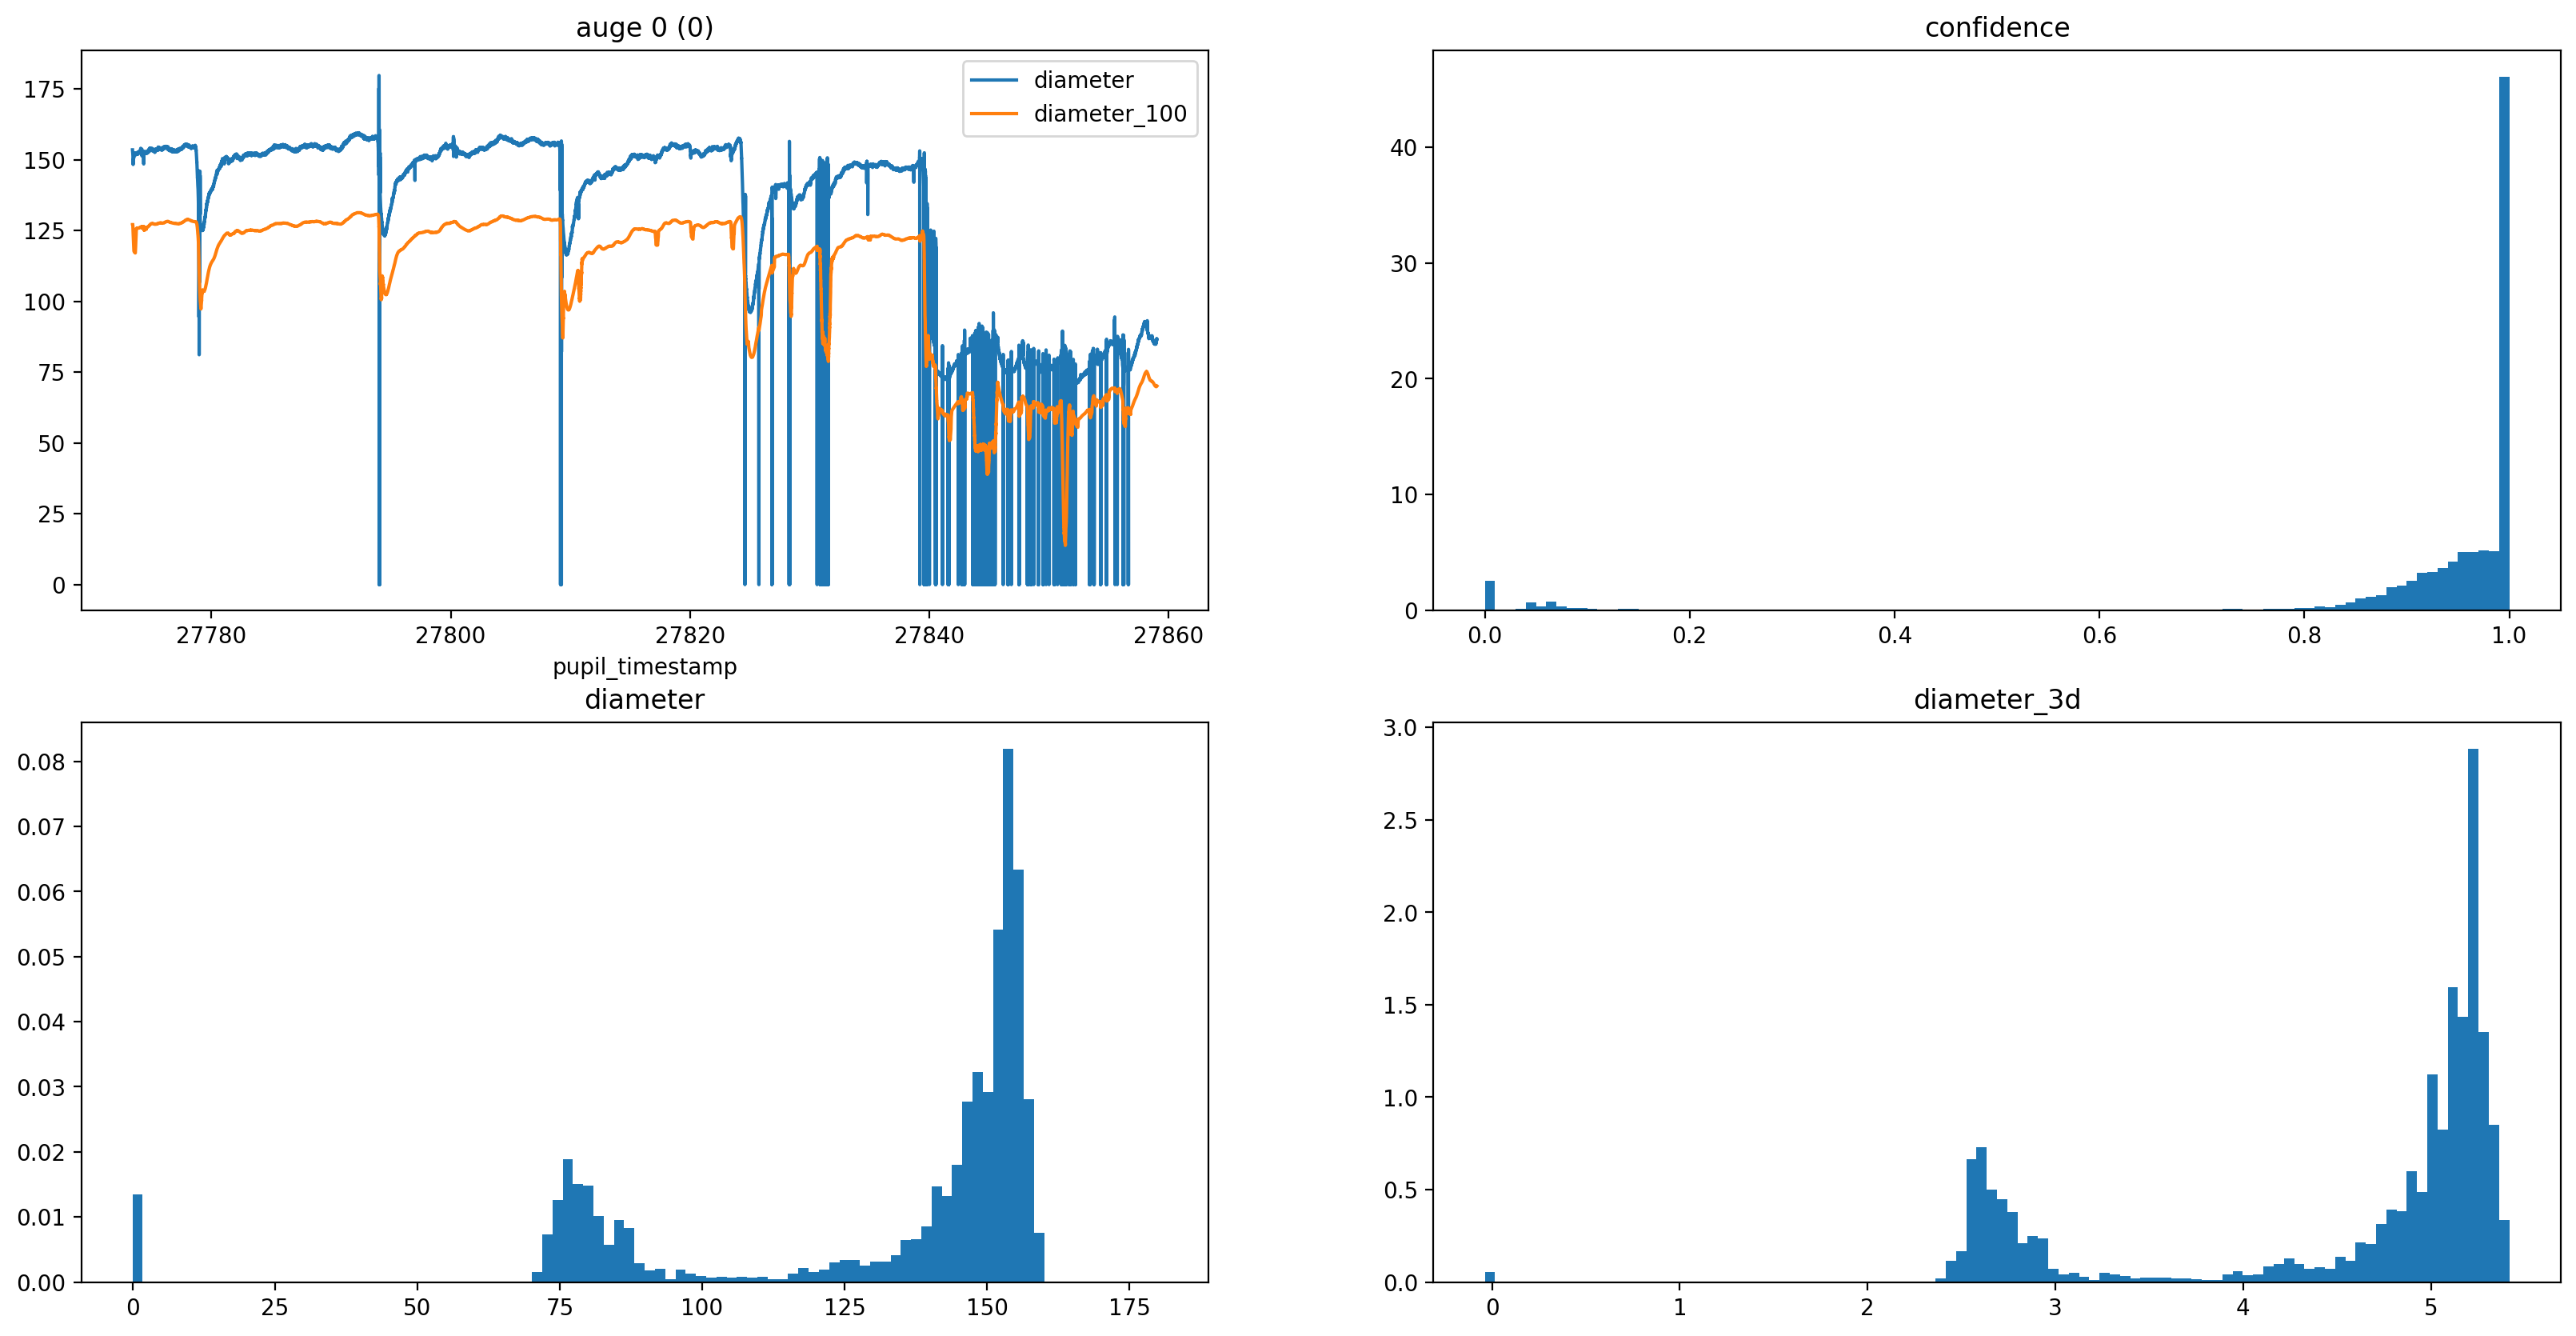

,pupil_timestamp,eye_id,confidence,diameter,diameter_3d,diameter_100,pupil_timestamp_based,rowid,timeslot
10750,27773.394969,0,0.965048,153.545731,NaN,127.126738,0.003254,0,0
10751,27773.394969,0,0.965048,153.522871,5.186446,127.117531,0.003254,1,0
10754,27773.403036,0,0.950132,153.344421,NaN,127.108182,0.011321,2,0
10755,27773.403036,0,0.950132,153.325403,5.179502,127.101383,0.011321,3,0
10758,27773.410923,0,1.000000,152.720485,5.159230,127.088824,0.019208,4,0
...,...,...,...,...,...,...,...,...,...
51815,27858.998821,0,1.000000,86.531479,NaN,70.054411,85.607106,20533,20
51818,27859.006871,0,1.000000,86.725915,2.932043,70.086564,85.615156,20534,20
51819,27859.006871,0,1.000000,86.726234,NaN,70.102132,85.615156,20535,20
51822,27859.014928,0,0.924724,86.810715,NaN,70.127477,85.623213,20536,20


In [2]:
# wenn ich checkpadata.py ändere, muß das Modul neu importiert werden. Das macht reload()
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ15_1_PLR1"
data_dir="/Users/Katharina/Desktop/Beispieldaten"
#data_dir="../data/groesse/3.4Stimulation/"
config=checkdata.DataConfig(window_duration=90)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
checkdata.plot(eye0[0],"auge 0 (0)")
display(eye0[0])


## Use datamatrix from pydatamatrix.eu to detect and reconstruct blinks

### Installation and import

Installation of packages. Import of python libraries and modules.

In [20]:
!pip install fastnumbers
!pip install datamatrix
import datamatrix
import datamatrix.series
import datamatrix.operations


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


The variable eye0 is converted into a data structure called a series using the datamatrix library. The data with the series structure is plotted.

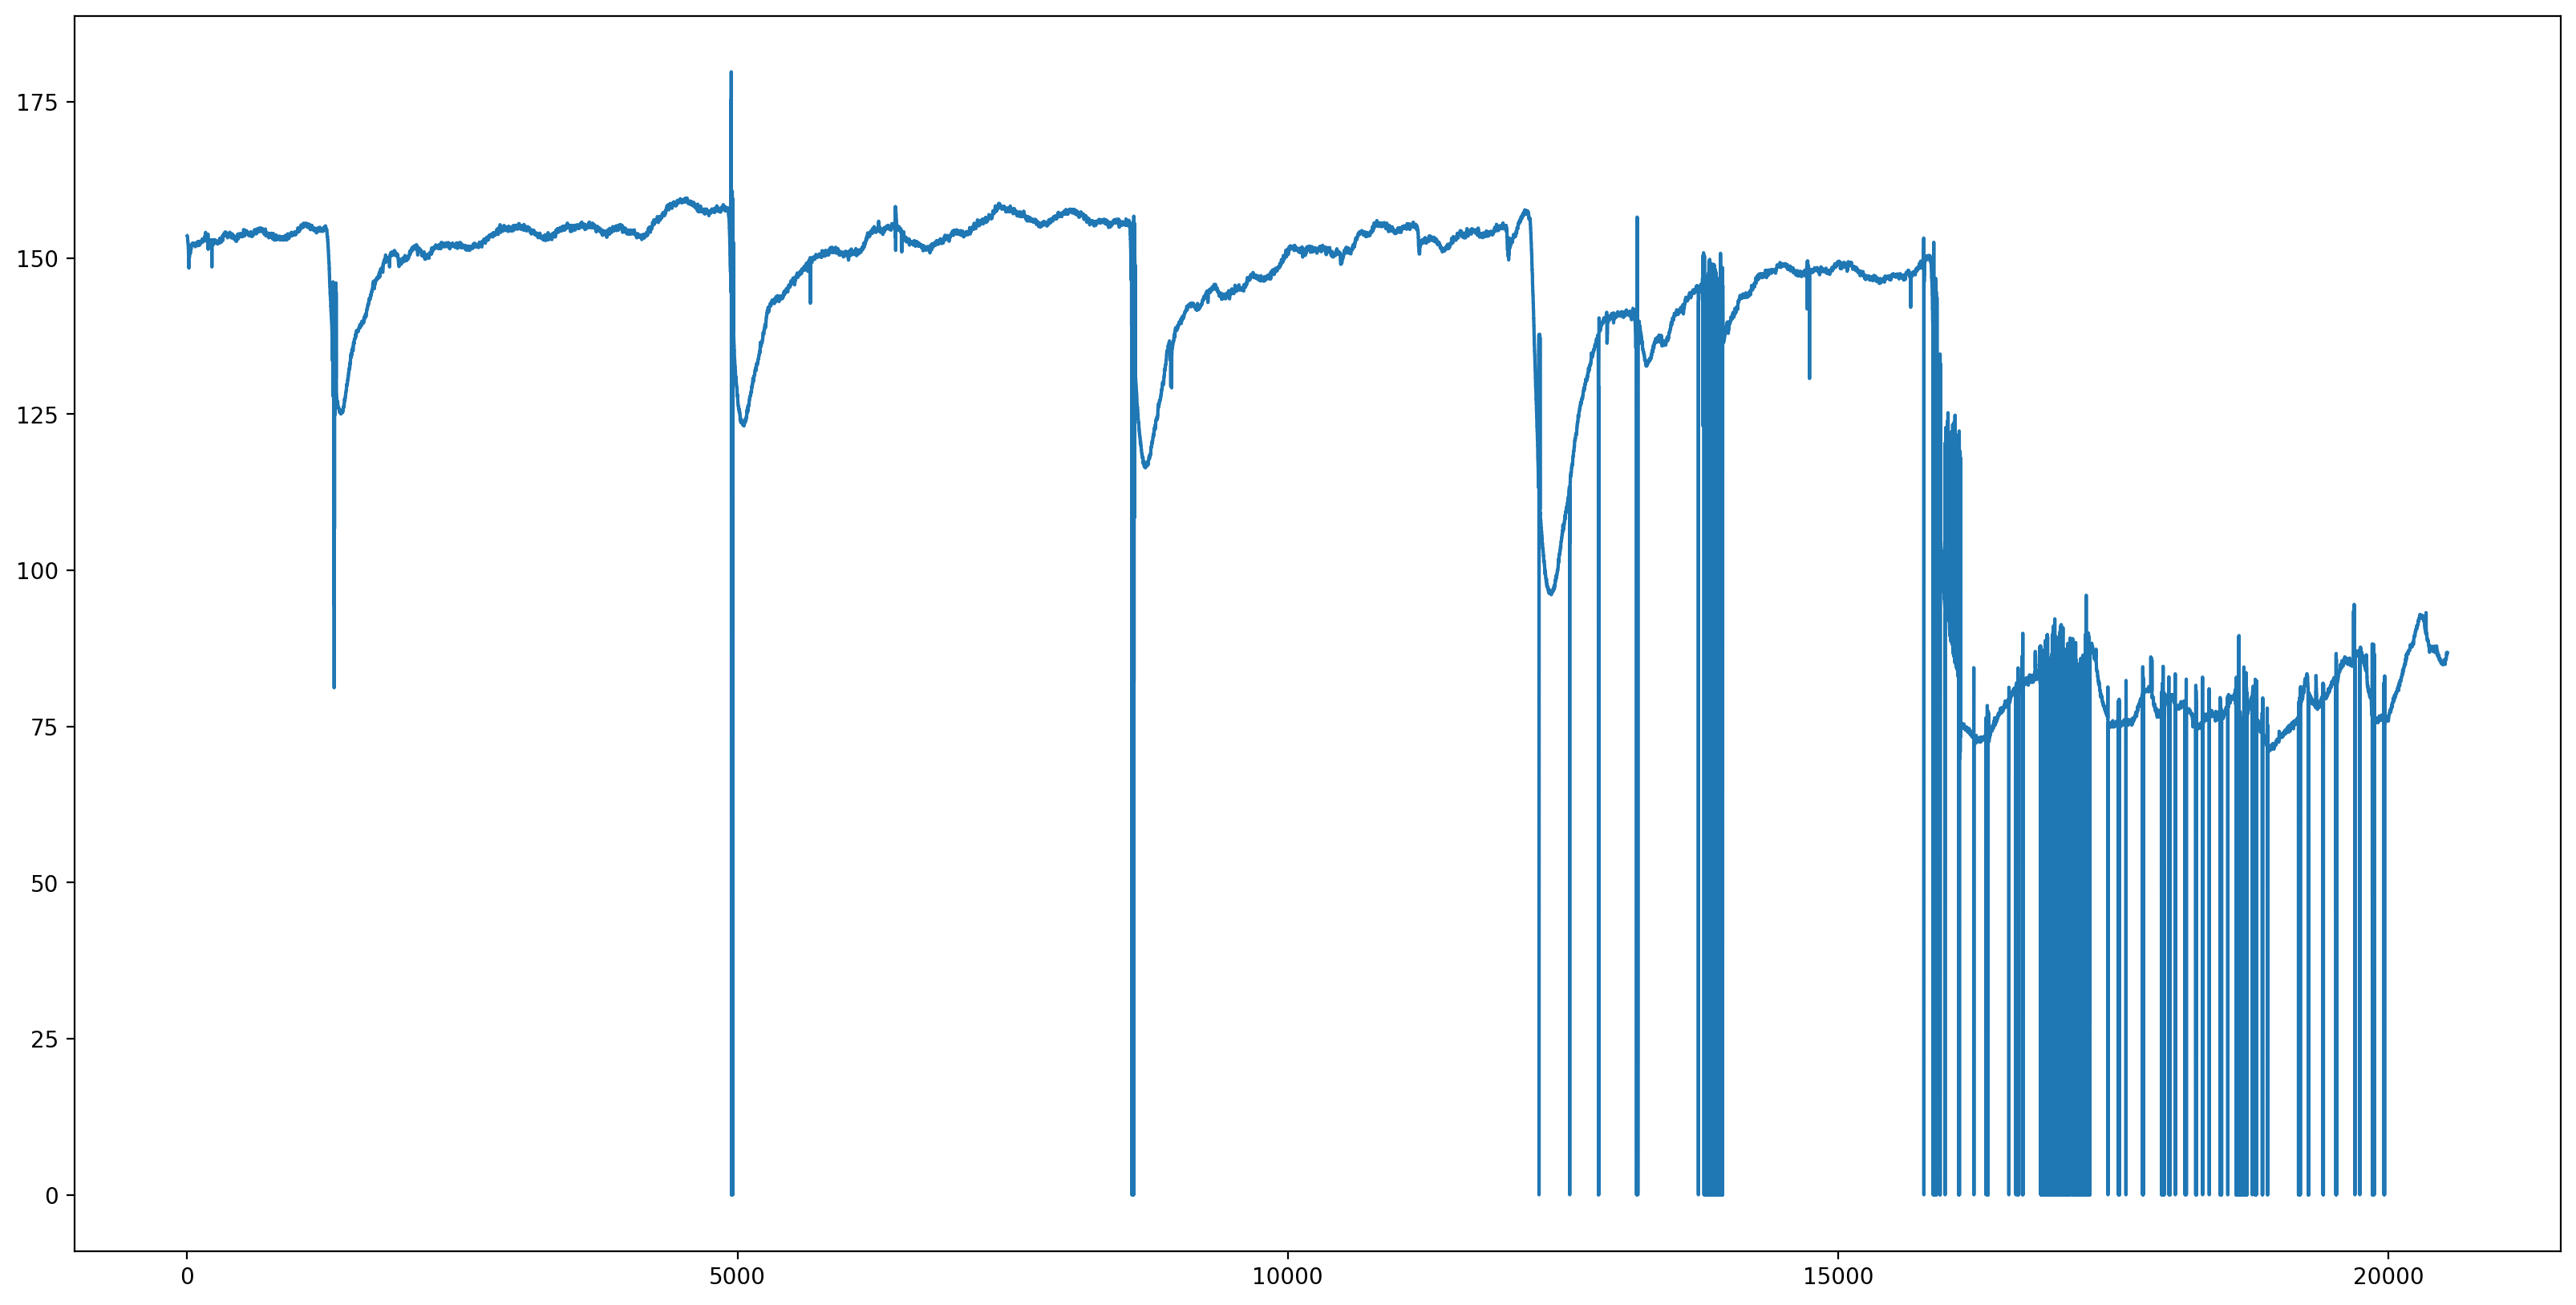

In [21]:
dm_eye0_diameter=datamatrix.convert.from_pandas(eye0[0])['diameter']
plt.plot(dm_eye0_diameter)

The blinkreconstruct function is then applied to the prepared data objectdm_eye0_diameter. The data after the application of the blinkreconstruct function is plotted. With the loop it is possible to check which parameter values fit best to the data and remove artefacts. The results are plotted.

<class 'list'>


pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

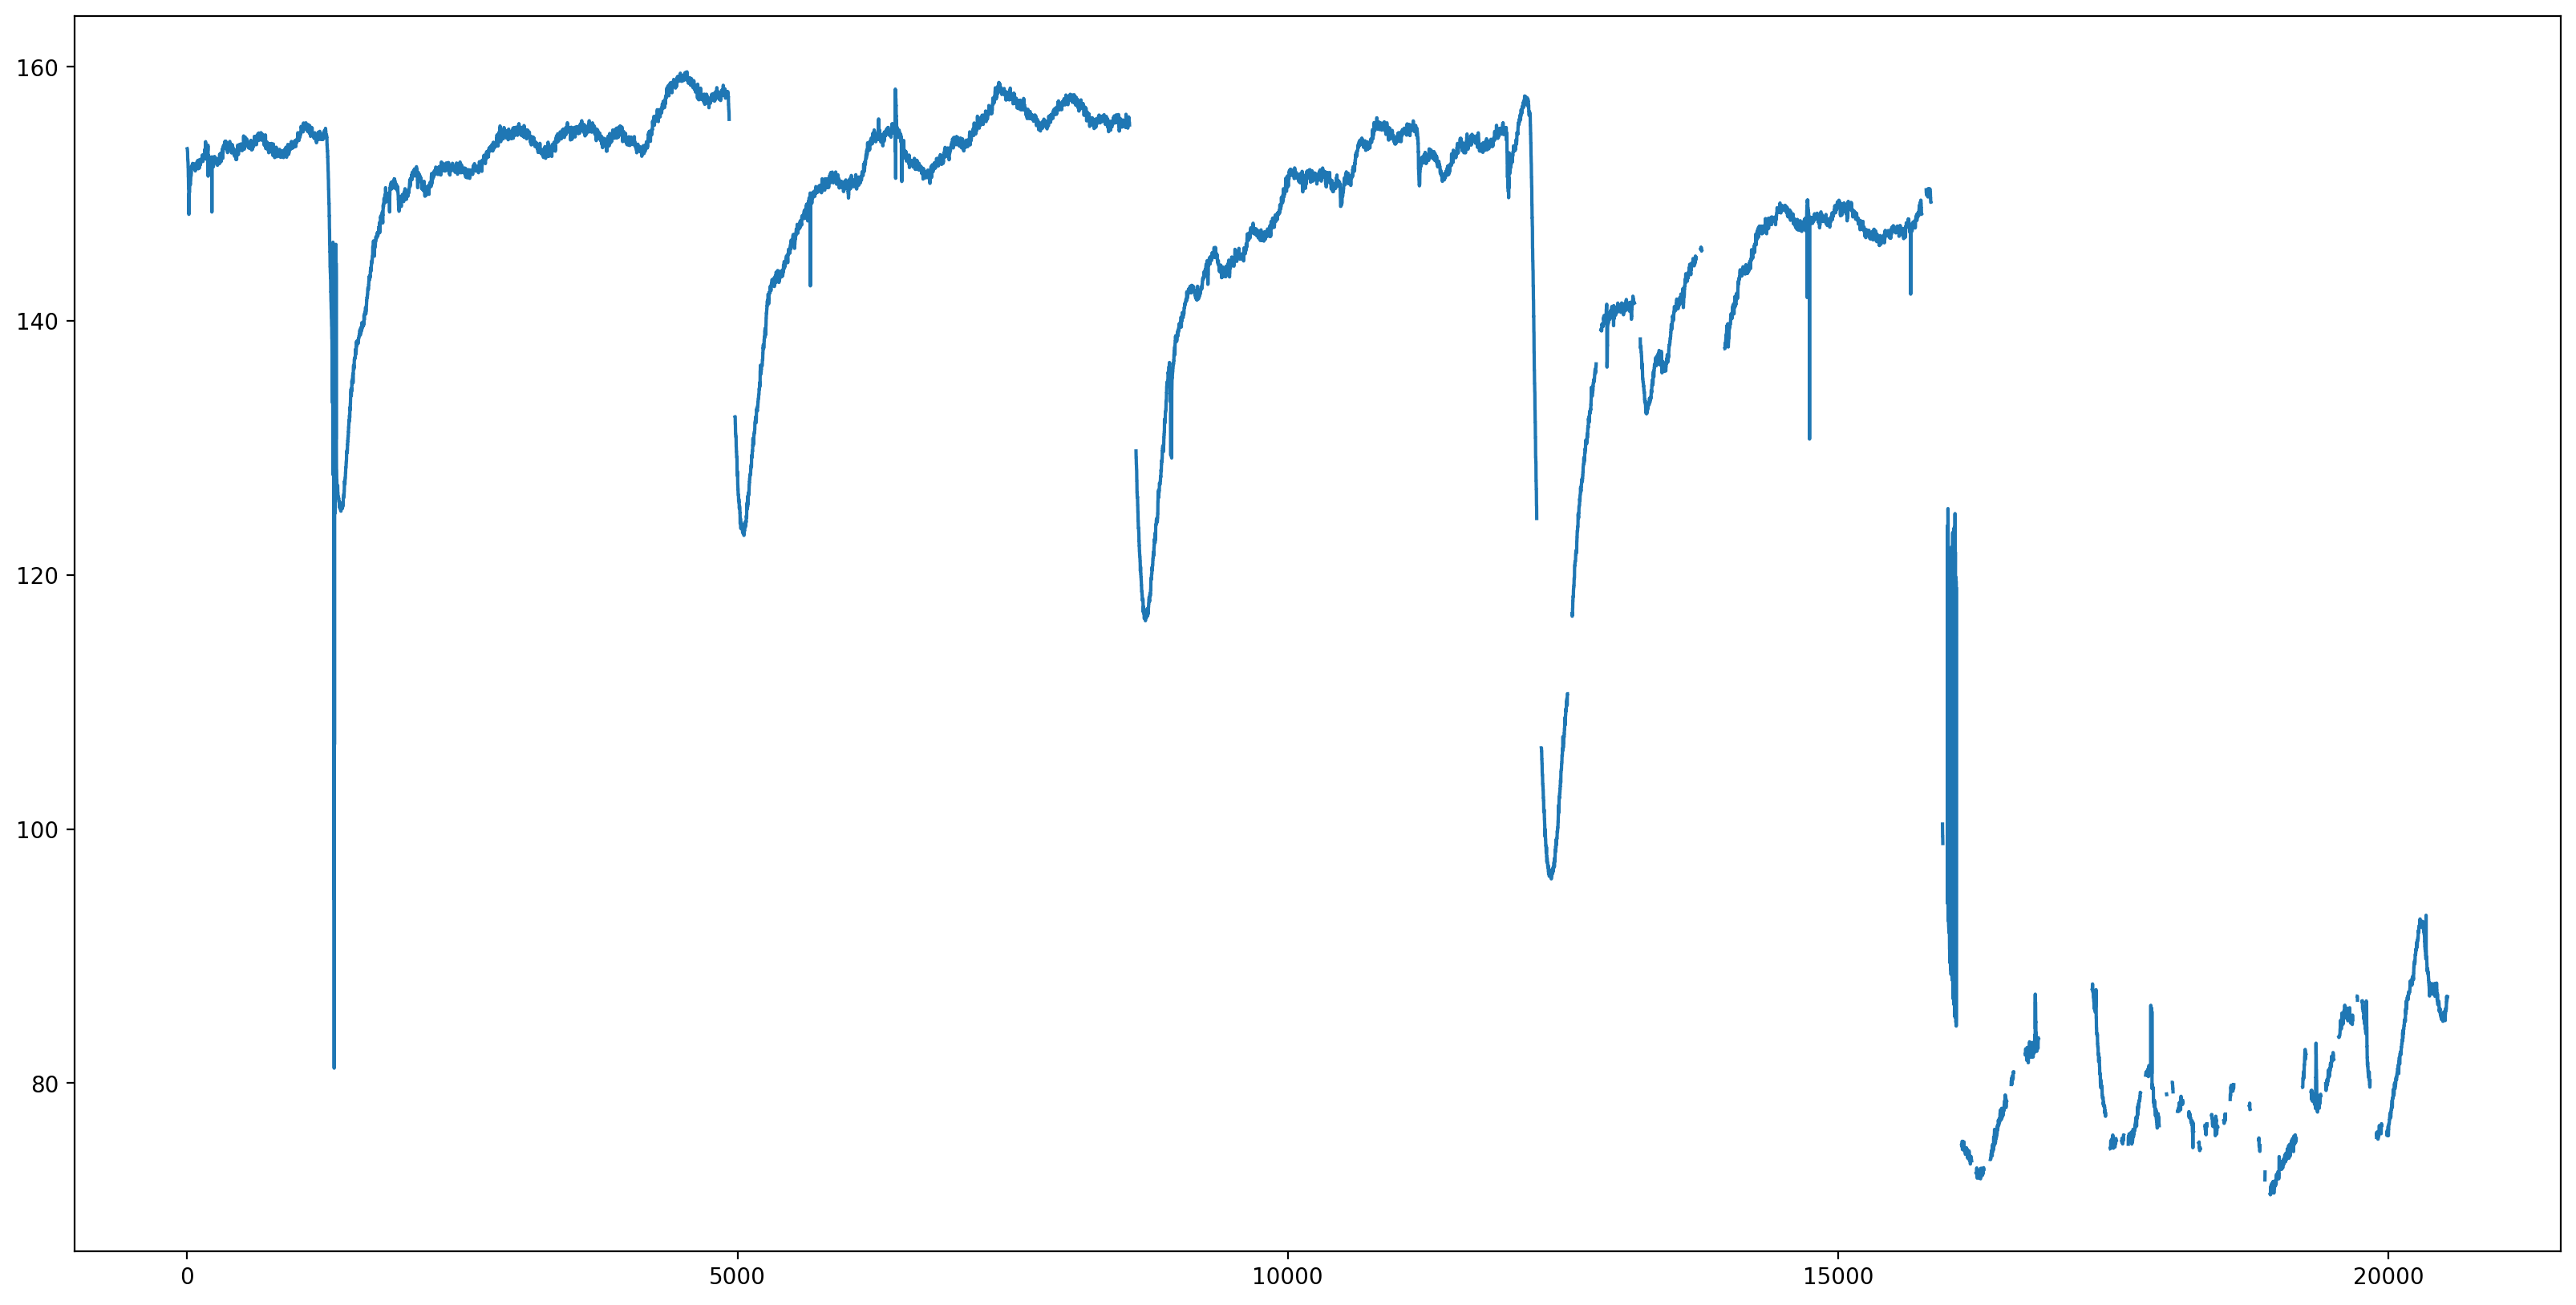

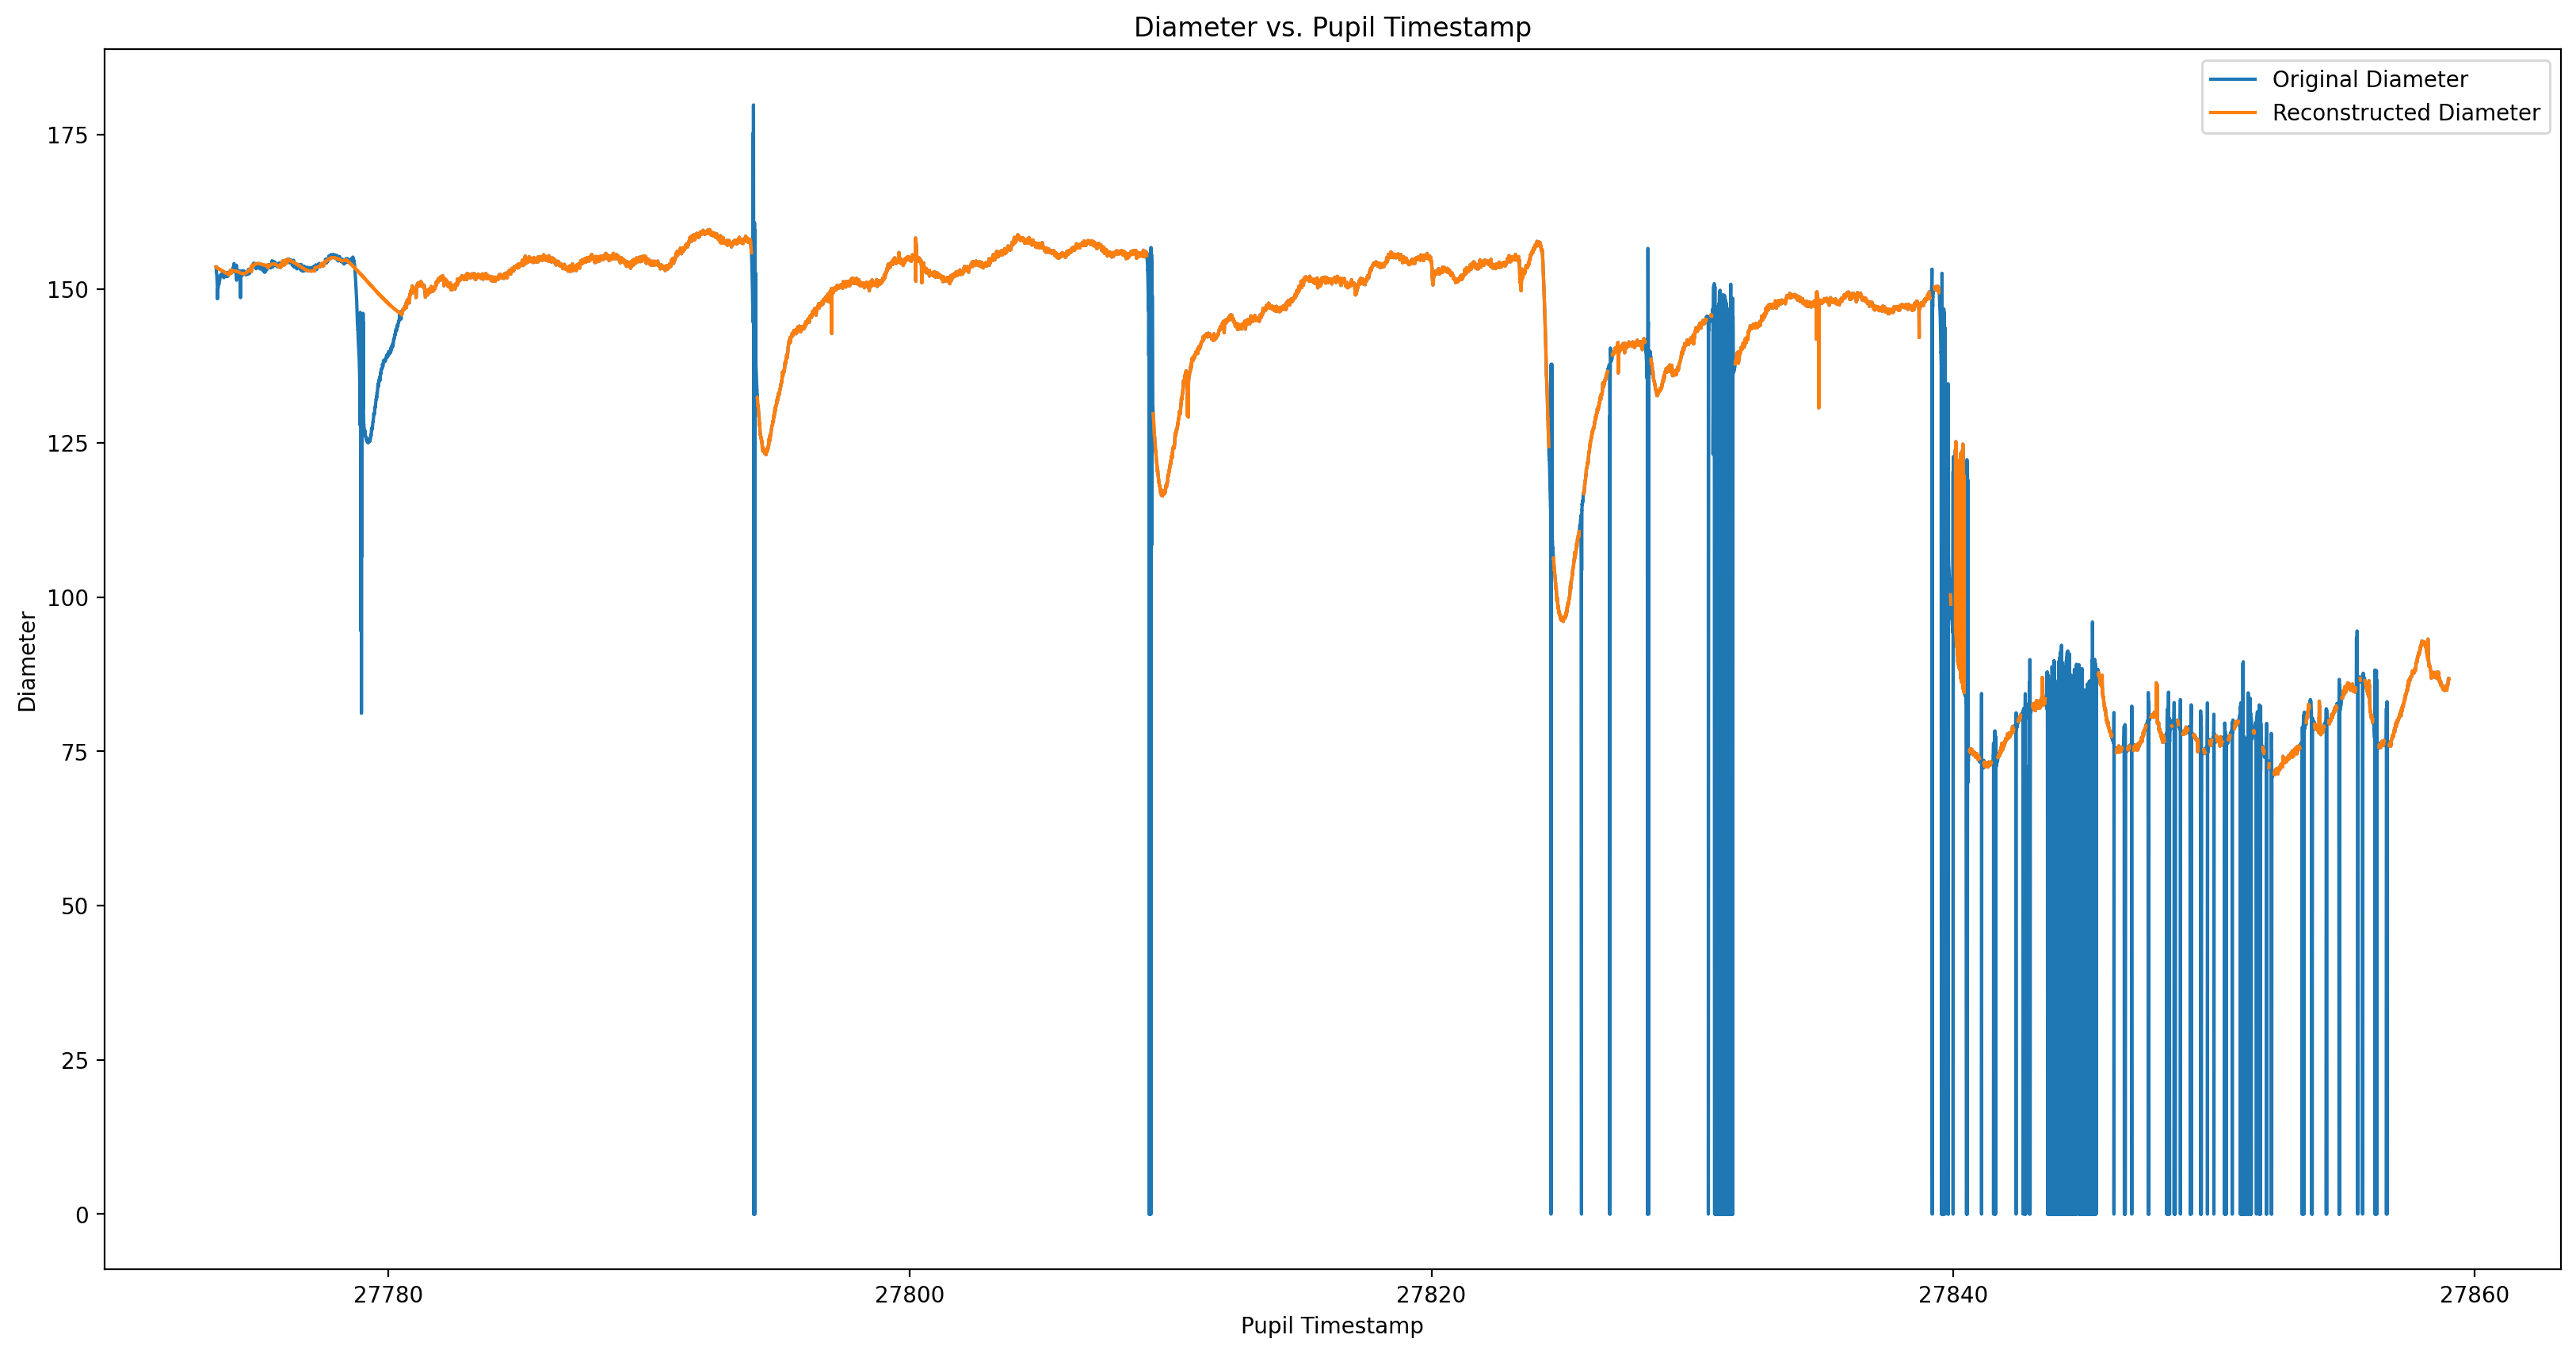

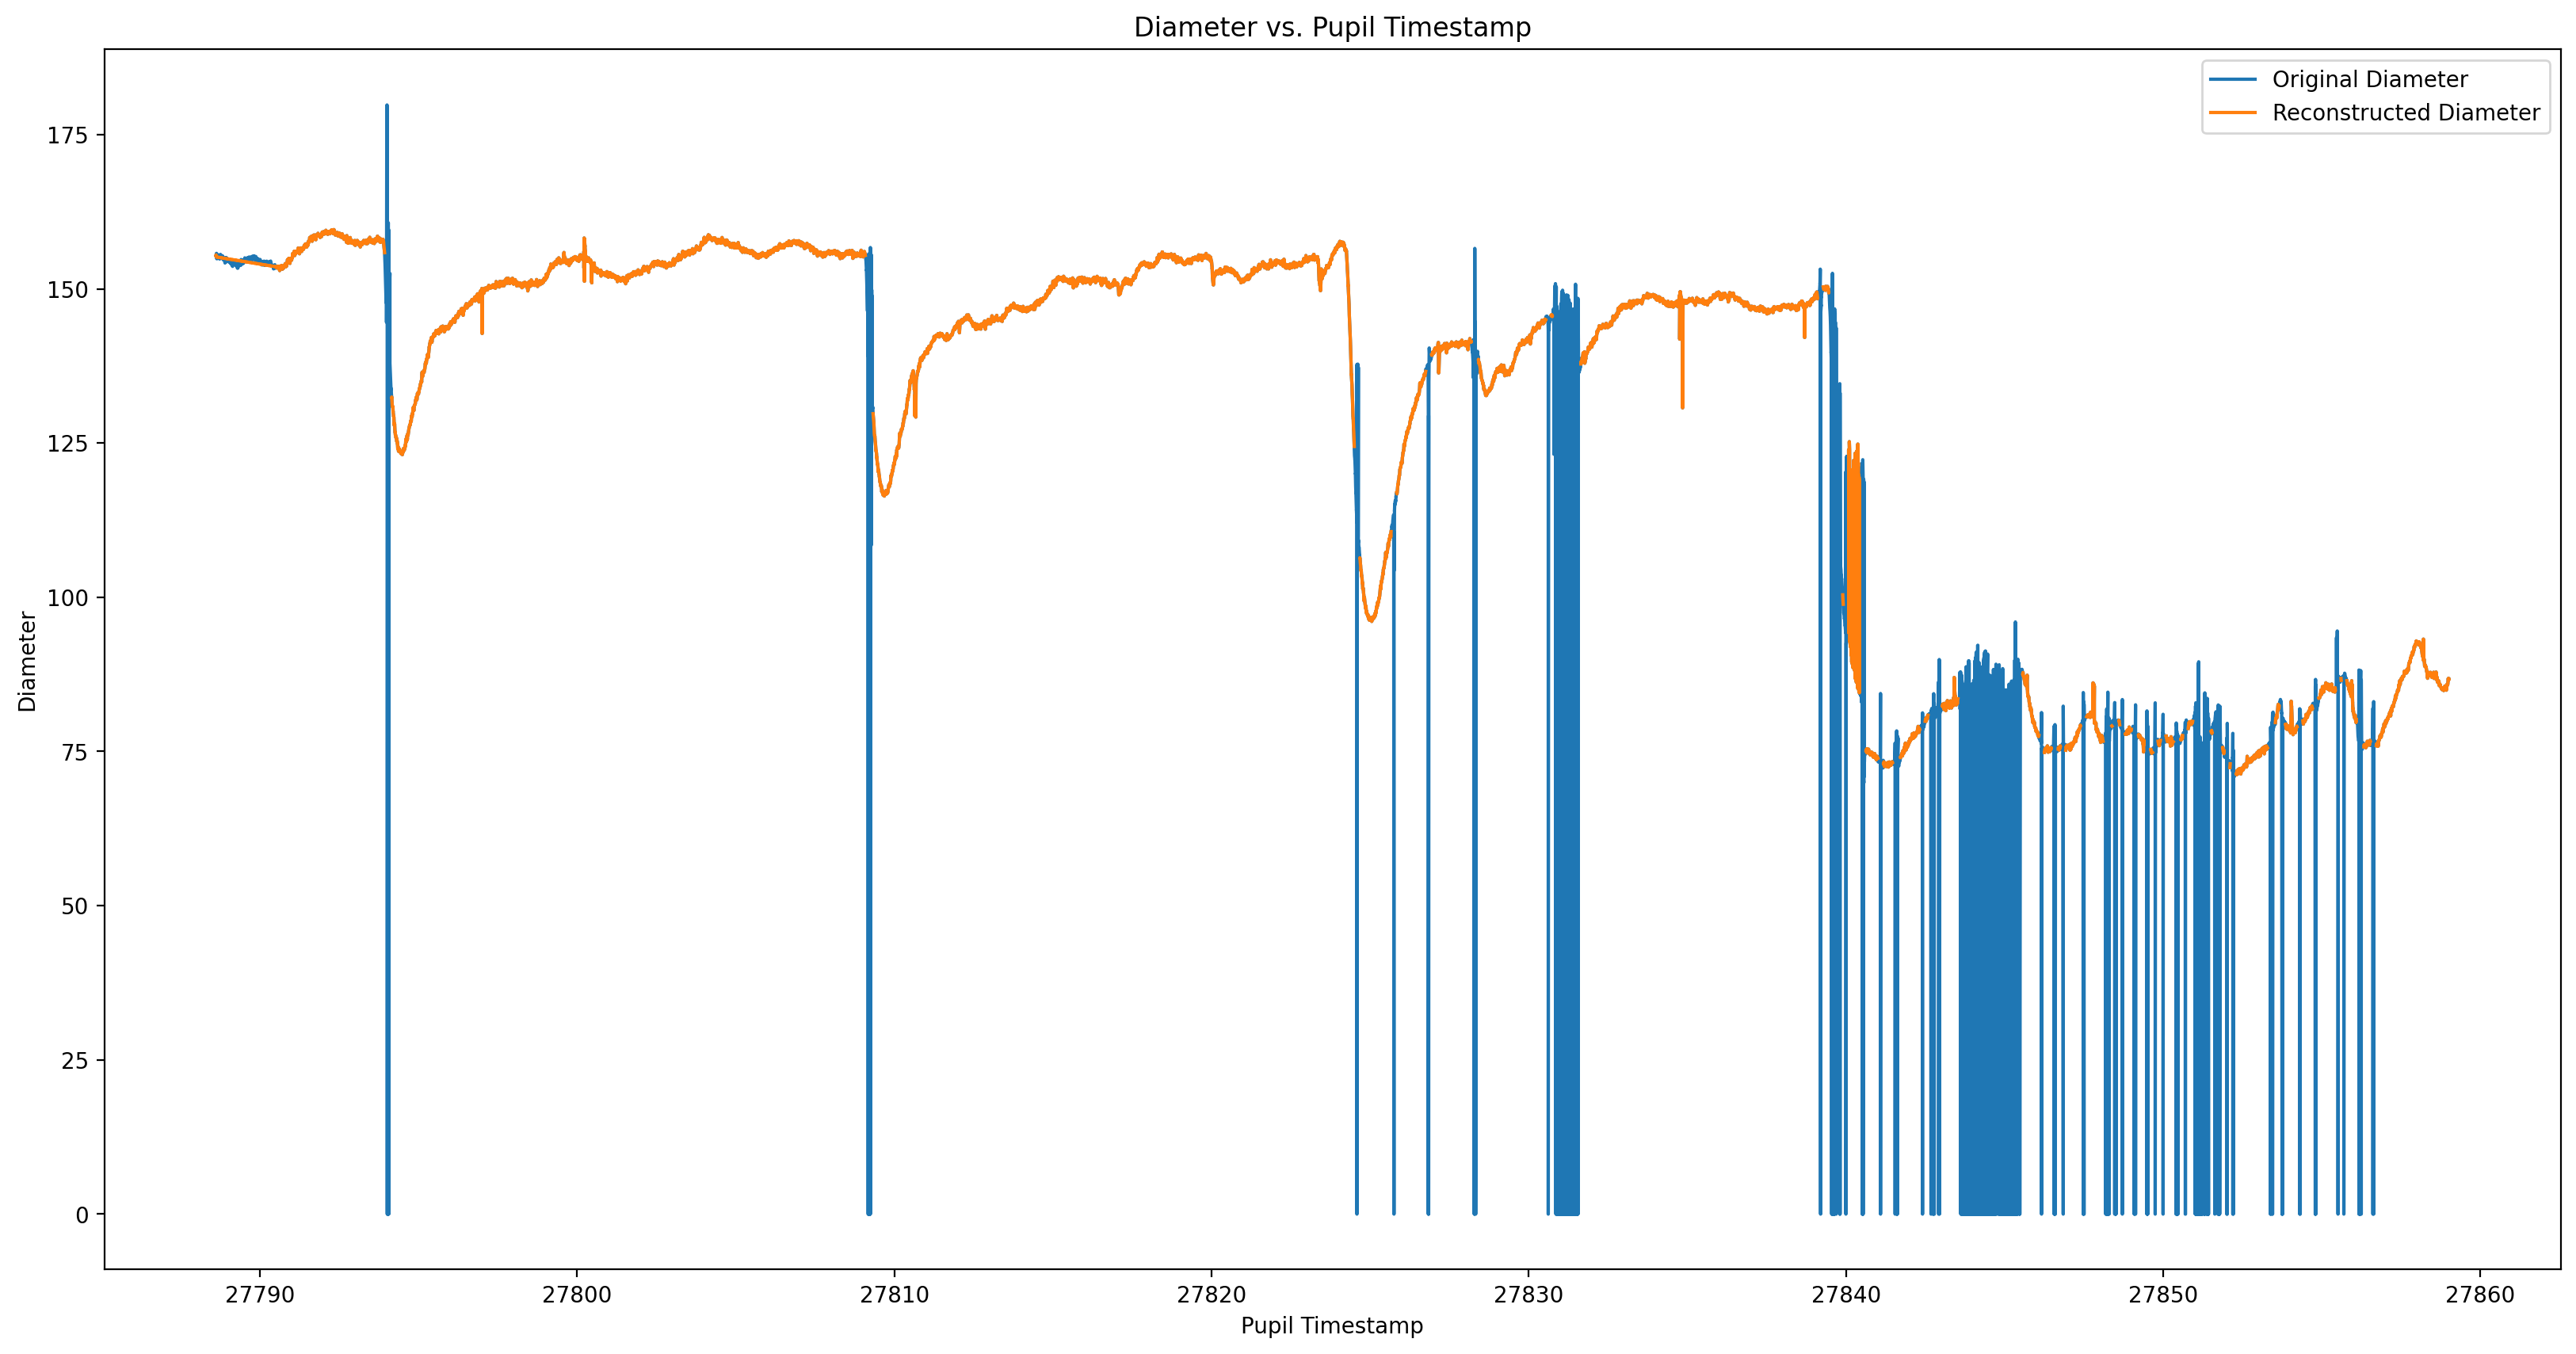

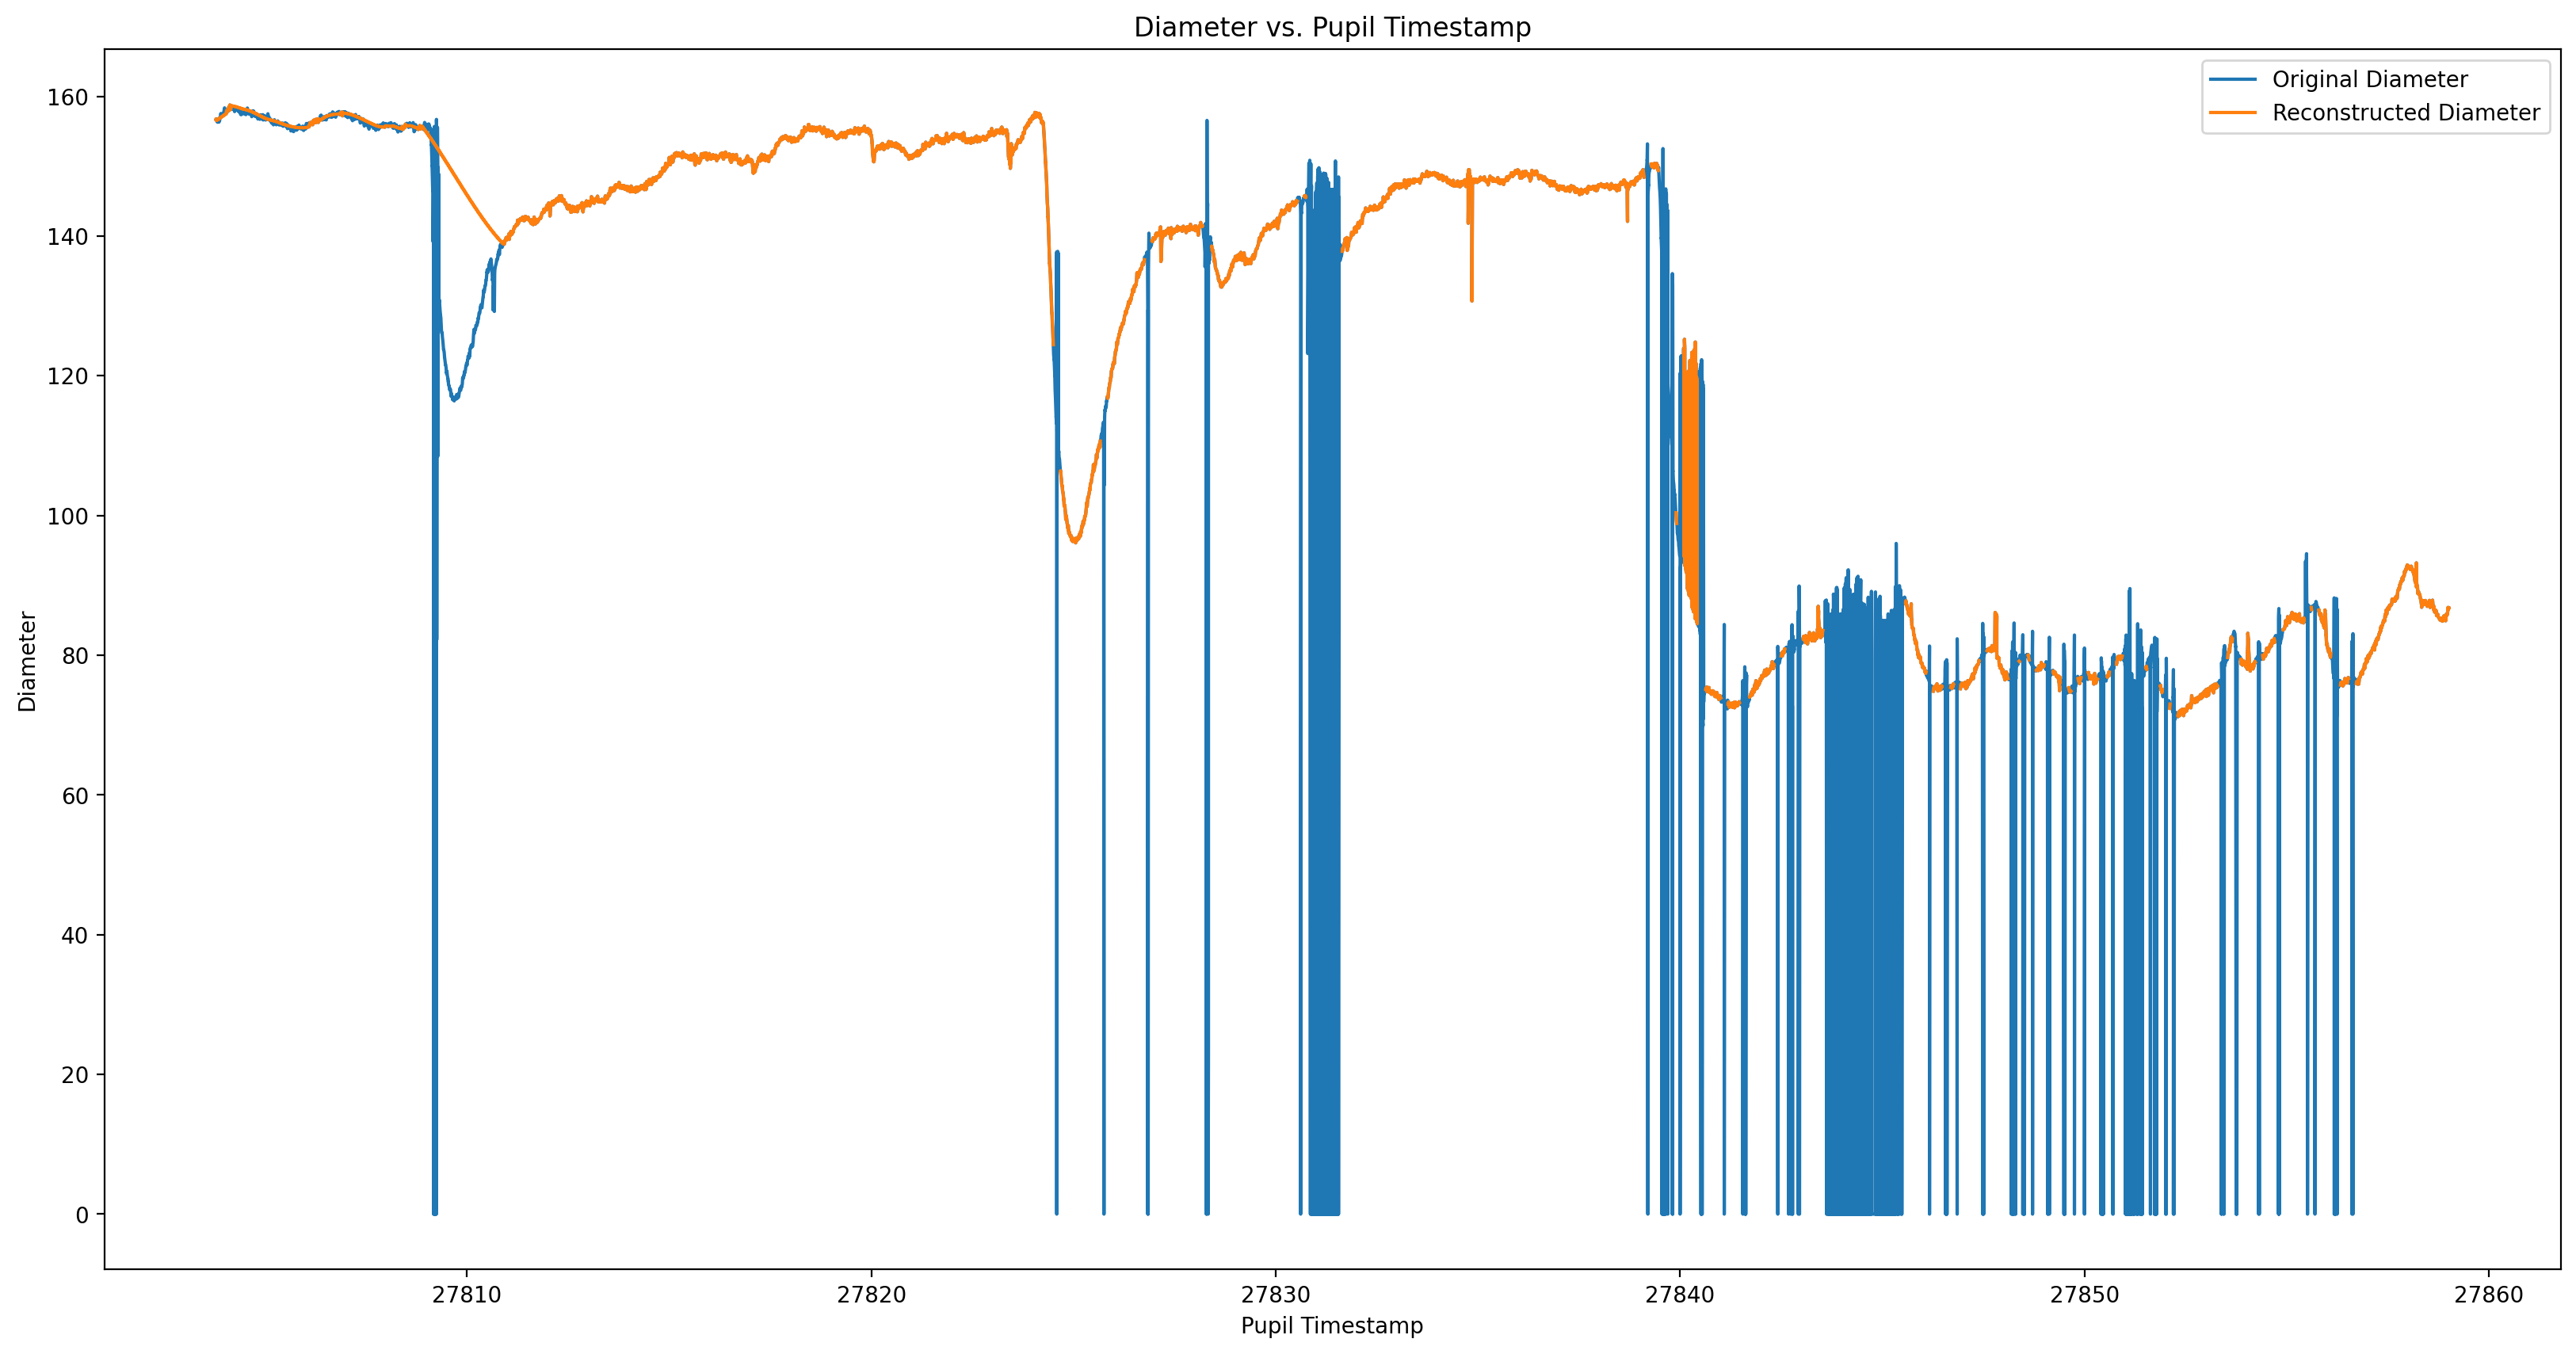

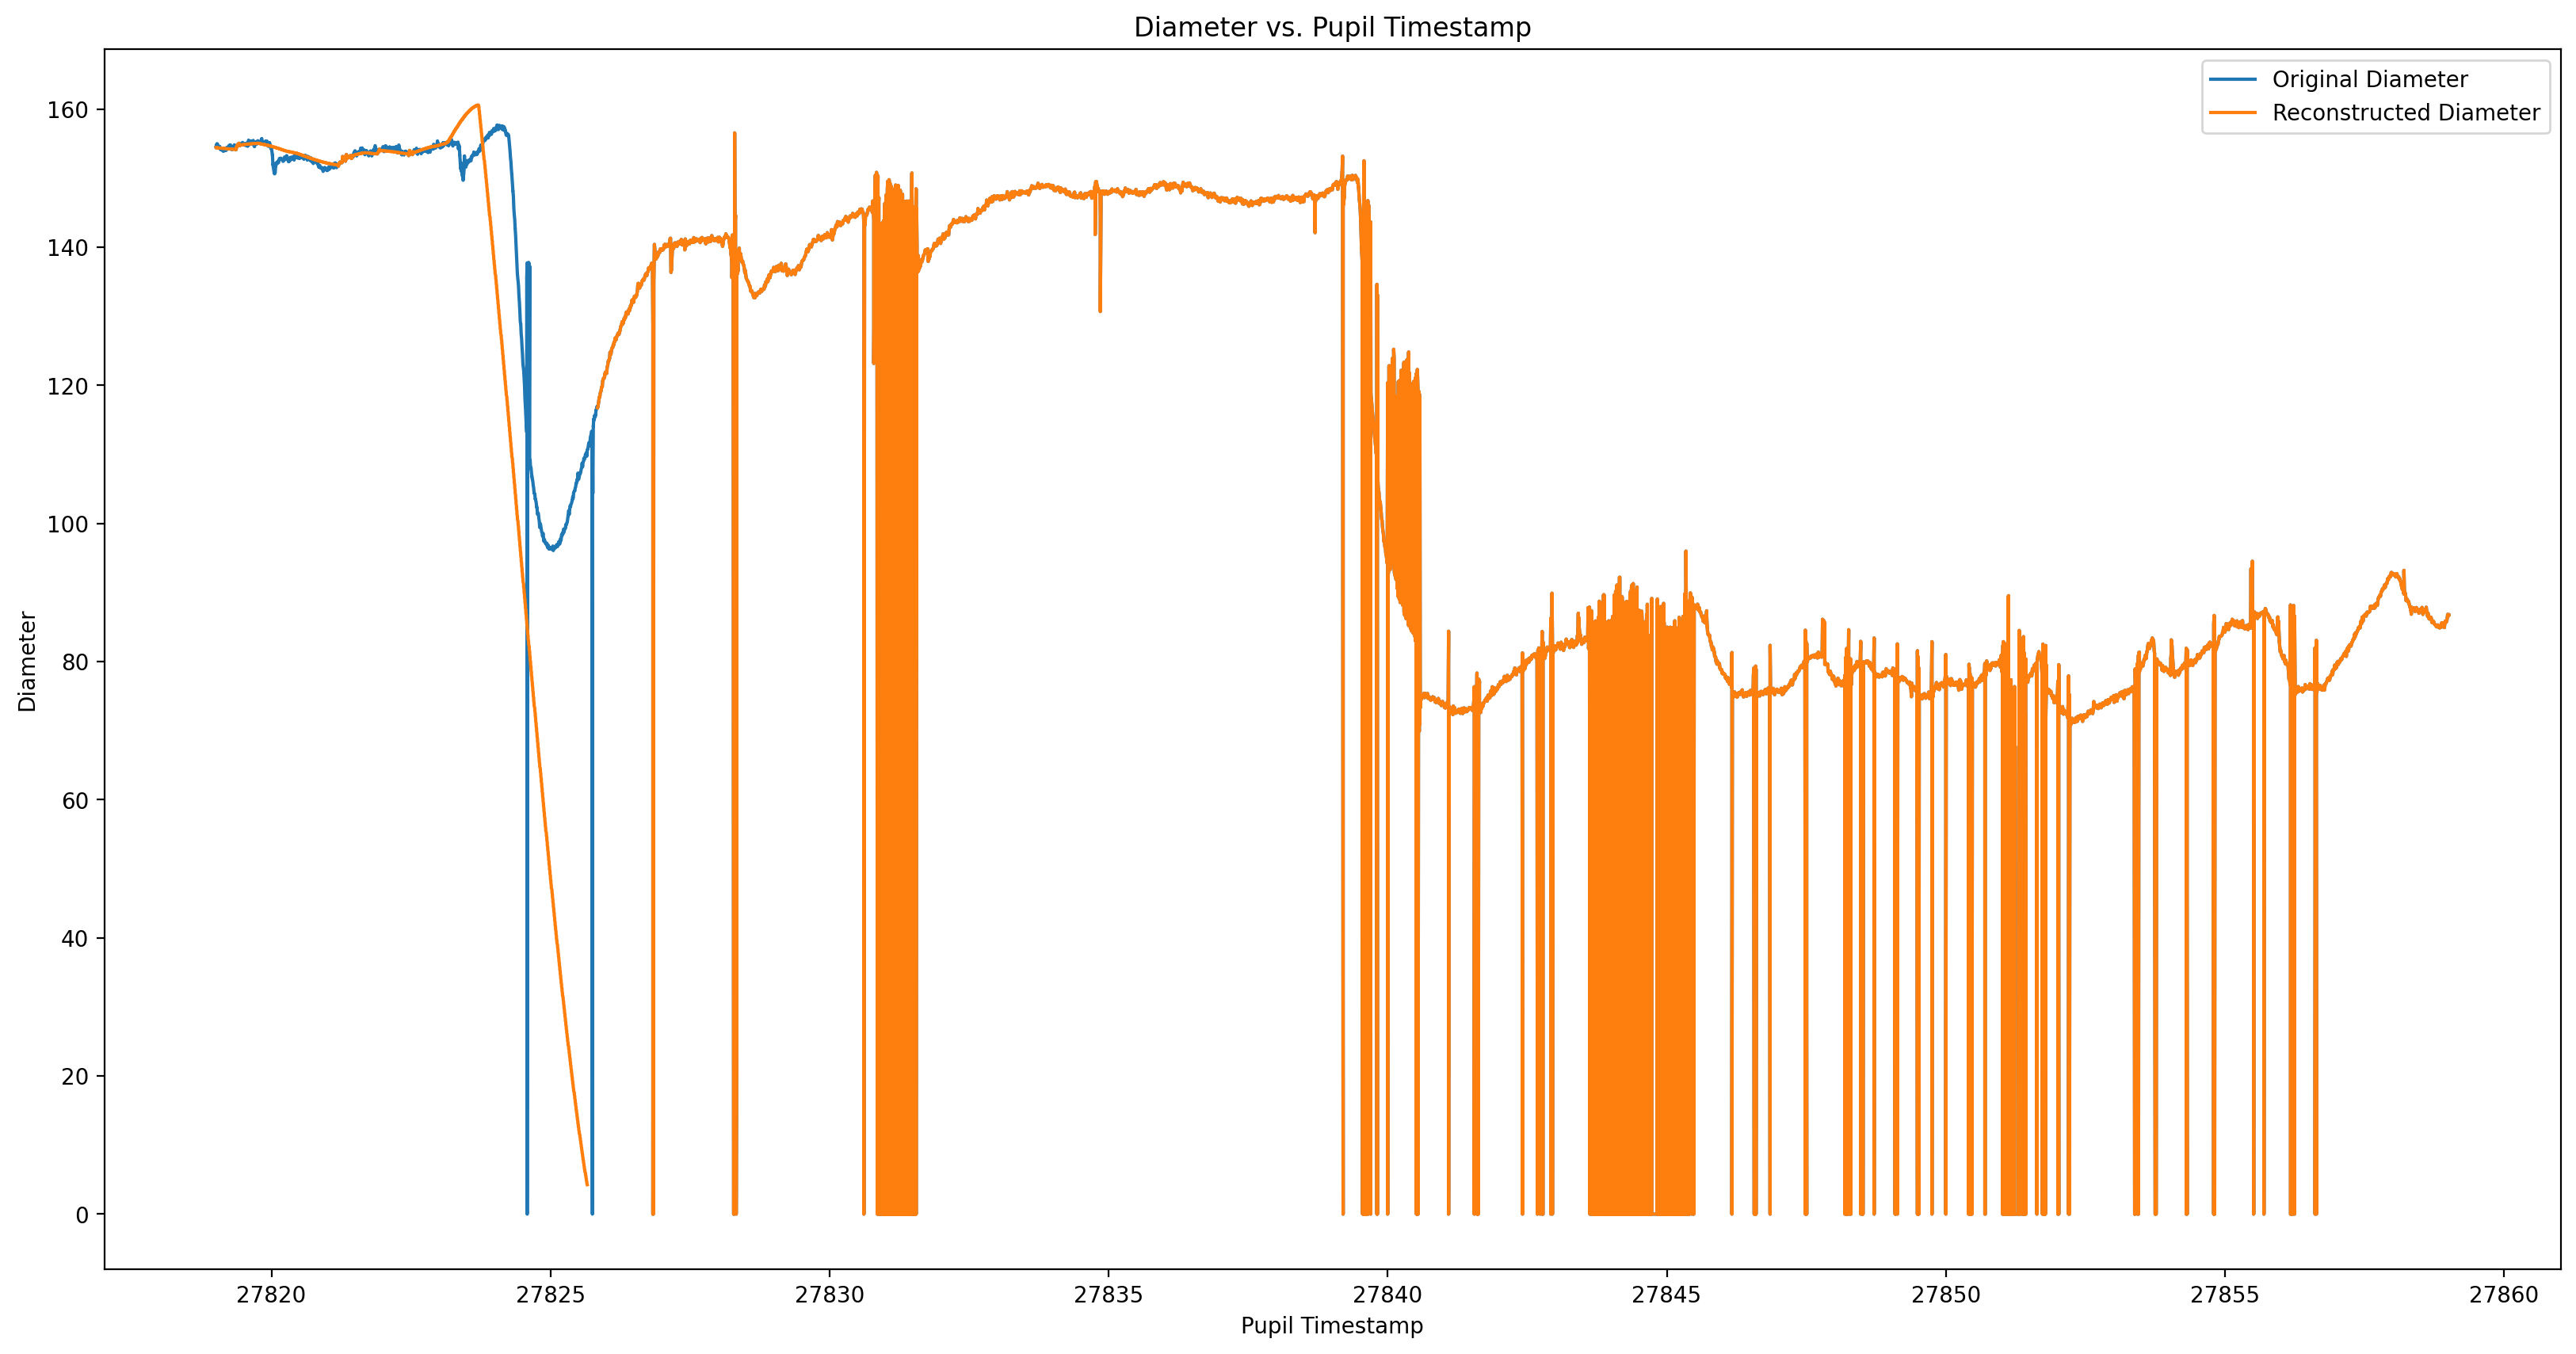

In [17]:
dm_eye0_diameter_fixed=datamatrix.series.blinkreconstruct(dm_eye0_diameter, mode='advanced')
plt.plot(dm_eye0_diameter_fixed)
print(type(eye0))

# Annahme: eye0 ist eine Liste von Objekten
for item in eye0:
    item['diameter_rec'] = checkdata.blinkreconstruct(item['diameter'], vt_start=10/800, vt_end=5/800, mode='advanced')

for item in eye0:
    diameter = item['diameter']
    diameter_rec = item['diameter_rec']
    pupil_timestamp = item['pupil_timestamp']

    # Erstelle den Plot für diese Daten
    plt.figure()
    plt.plot(pupil_timestamp, diameter, label='Original Diameter')
    plt.plot(pupil_timestamp, diameter_rec, label='Reconstructed Diameter')
    plt.xlabel('Pupil Timestamp')
    plt.ylabel('Diameter')
    plt.title('Diameter vs. Pupil Timestamp')
    plt.legend()
    plt.show()